Exponential distribution: KS statistic = 0.802269429670003, p-value = 3.269794607828747e-35


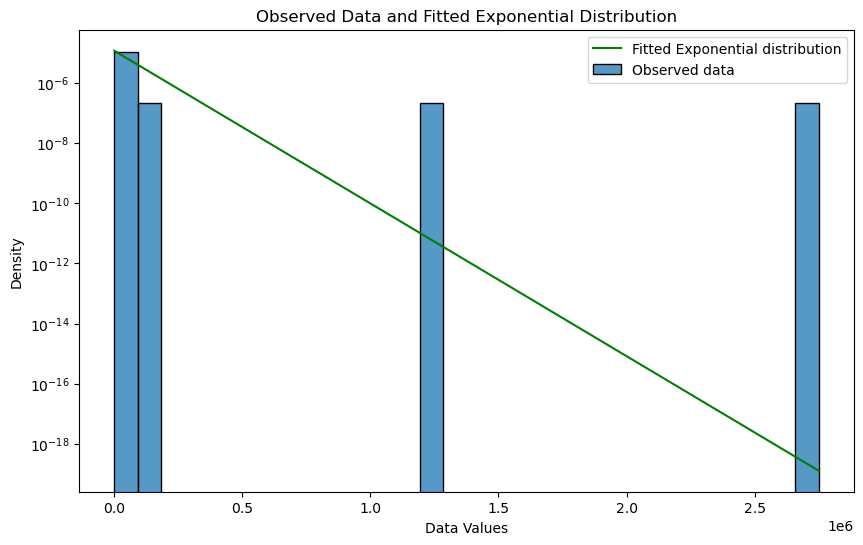

In [18]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 你的频次数据
data = [
    2750149, 1239763, 172203, 52802, 19173, 11470, 7387, 5138, 3674, 2887,
    2286, 1756, 1384, 1176, 964, 826, 669, 572, 519, 501, 393, 347, 345, 333, 
    273, 269, 214, 229, 210, 167, 152, 165, 138, 137, 127, 110, 79, 98, 92, 82, 
    68, 89, 71, 62, 87, 56, 67, 56, 51, 60
]

# 拟合指数分布
exp_params = stats.expon.fit(data)
ks_stat_exp, p_value_exp = stats.kstest(data, 'expon', exp_params)

# 输出结果
print(f'Exponential distribution: KS statistic = {ks_stat_exp}, p-value = {p_value_exp}')

# 可视化：显示直方图和拟合的指数分布
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, stat='density', edgecolor='black', bins=30, label='Observed data')

# 绘制拟合的指数分布
x = np.linspace(min(data), max(data), 100)
pdf_exp = stats.expon.pdf(x, *exp_params)
plt.plot(x, pdf_exp, 'g-', label='Fitted Exponential distribution')

plt.legend()
plt.title('Observed Data and Fitted Exponential Distribution')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.savefig('fitted_exponential_distribution.png')
plt.show()




90%分位数: 1737.0ns
99%分位数: 5666.0ns


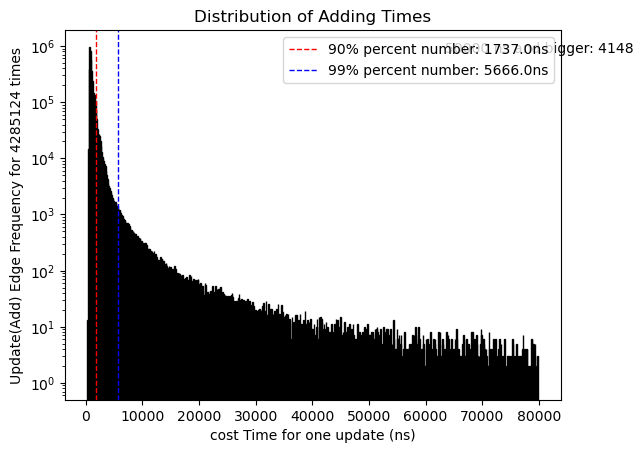

In [24]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取日志文件
with open('run_p_nano.log', 'r') as file:
    log_data = file.readlines()

# 提取添加时间
adding_times = []
total_num = 0
for line in log_data:
    match = re.search(r'Duration: (\d+) ns', line)
    if match:
        adding_times.append(float(match.group(1)))
        total_num += 1

# 计算90%分位数
percentile_90 = np.percentile(adding_times, 90)
print(f'90%分位数: {percentile_90}ns')

# 计算99%分位数
percentile_99 = np.percentile(adding_times, 99)
print(f'99%分位数: {percentile_99}ns')

# 定义区间
bins = np.arange(250, 80000, 125)
bins = np.append(bins, [float('inf')])  # 添加一个无限大的区间

# 统计每个区间的频率
hist, bin_edges = np.histogram(adding_times, bins=bins)

# 打印每个区间的频率
# for i in range(len(hist)):
#     if i == len(hist) - 1:
#         print(f'{bin_edges[i]} ns 及以上: {hist[i]}')
#     else:
#         print(f'{bin_edges[i]} ns - {bin_edges[i+1]} ns: {hist[i]}')

# 绘制直方图
plt.hist(adding_times, bins=bin_edges, edgecolor='black')
plt.axvline(percentile_90, color='r', linestyle='dashed', linewidth=1, label=f'90% percent number: {percentile_90}ns')
plt.axvline(percentile_99, color='b', linestyle='dashed', linewidth=1, label=f'99% percent number: {percentile_99}ns')
plt.xlabel('cost Time for one update (ns)')
plt.ylabel(f'Update(Add) Edge Frequency for {total_num} times')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.title('Distribution of Adding Times')
# 标注 50000 ns 及以上的数据量
plt.text(80000, max(hist) * 0.8, f'50000 ns and bigger: {hist[-1]}', color='black', ha='center')
plt.legend()



plt.savefig('adding_times_distribution_Nano2.png')
plt.show()
# print(hist)


Exponential distribution: KS statistic = 0.8343581225303721, p-value = 0.0


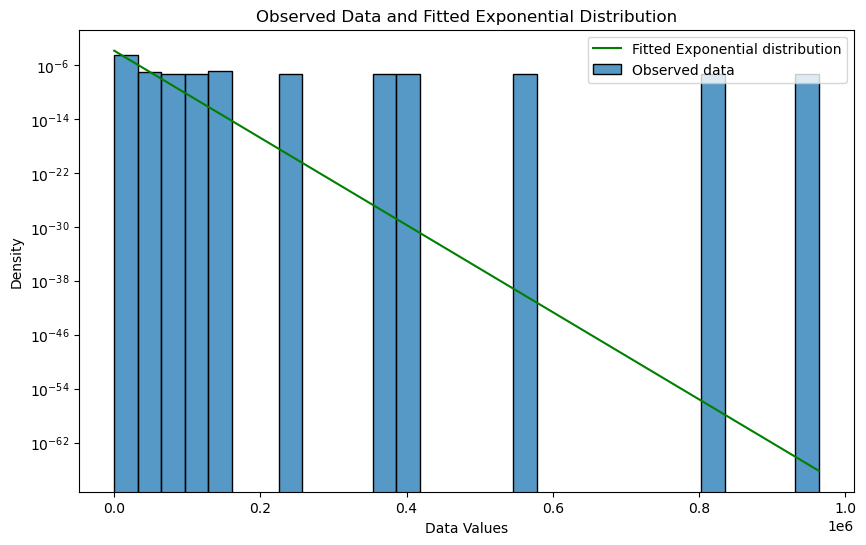

In [25]:
# 拟合指数分布
data = hist
exp_params = stats.expon.fit(data)
ks_stat_exp, p_value_exp = stats.kstest(data, 'expon', exp_params)

# 输出结果
print(f'Exponential distribution: KS statistic = {ks_stat_exp}, p-value = {p_value_exp}')

# 可视化：显示直方图和拟合的指数分布
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, stat='density', edgecolor='black', bins=30, label='Observed data')

# 绘制拟合的指数分布
x = np.linspace(min(data), max(data), 100)
pdf_exp = stats.expon.pdf(x, *exp_params)
plt.plot(x, pdf_exp, 'g-', label='Fitted Exponential distribution')

plt.legend()
plt.title('Observed Data and Fitted Exponential Distribution')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.savefig('fitted_exponential_distribution.png')
plt.show()


In [ ]:
data = hist
# 拟合正态分布
norm_params = stats.norm.fit(data)
ks_stat_norm, p_value_norm = stats.kstest(data, 'norm', norm_params)

# 拟合对数正态分布
lognorm_params = stats.lognorm.fit(data, floc=0)
ks_stat_lognorm, p_value_lognorm = stats.kstest(data, 'lognorm', lognorm_params)

# 拟合伽马分布
gamma_params = stats.gamma.fit(data)
ks_stat_gamma, p_value_gamma = stats.kstest(data, 'gamma', gamma_params)

# 输出结果
print(f'Normal distribution: KS statistic = {ks_stat_norm}, p-value = {p_value_norm}')
print(f'Lognormal distribution: KS statistic = {ks_stat_lognorm}, p-value = {p_value_lognorm}')
print(f'Gamma distribution: KS statistic = {ks_stat_gamma}, p-value = {p_value_gamma}')

# 可视化：显示直方图和拟合的分布
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, stat='density', edgecolor='black', bins=30, label='Observed data')

# 绘制拟合的正态分布
x = np.linspace(min(data), max(data), 100)
pdf_norm = stats.norm.pdf(x, *norm_params)
plt.plot(x, pdf_norm, 'r-', label='Fitted Normal distribution')

# 绘制拟合的对数正态分布
pdf_lognorm = stats.lognorm.pdf(x, *lognorm_params)
plt.plot(x, pdf_lognorm, 'g-', label='Fitted Lognormal distribution')

# 绘制拟合的伽马分布
pdf_gamma = stats.gamma.pdf(x, *gamma_params)
plt.plot(x, pdf_gamma, 'b-', label='Fitted Gamma distribution')

plt.legend()
plt.title('Observed Data and Fitted Distributions')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.savefig('fitted_distributions.png')
plt.show()


FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'lognorm' requires that 0.0 < x < inf for each x in `data`.

/home/haibin/miniconda3/envs/UUKG/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


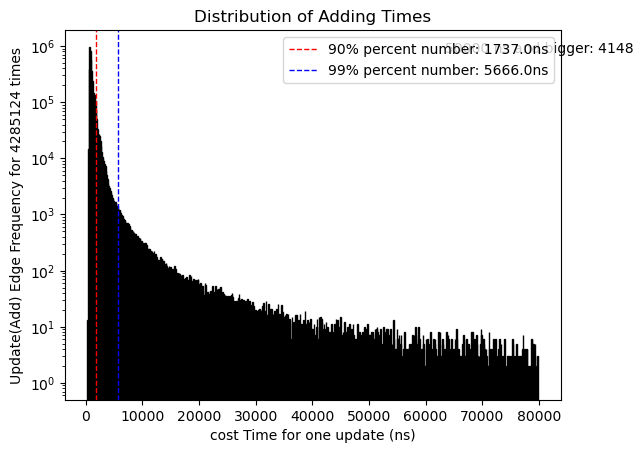

In [30]:
import pandas as pd
# 将频数数据保存到 CSV 文件中
hist_data = {
    'Bin Start (ns)': bin_edges[:-1].astype(int),
    'Bin End (ns)': bin_edges[1:].astype(int),
    'Frequency': hist
}
df_hist = pd.DataFrame(hist_data)
df_hist.to_csv('frequency_distribution.csv', index=False)

# 绘制直方图
plt.hist(adding_times, bins=bin_edges, edgecolor='black')
plt.axvline(percentile_90, color='r', linestyle='dashed', linewidth=1, label=f'90% percent number: {percentile_90}ns')
plt.axvline(percentile_99, color='b', linestyle='dashed', linewidth=1, label=f'99% percent number: {percentile_99}ns')
plt.xlabel('cost Time for one update (ns)')
plt.ylabel(f'Update(Add) Edge Frequency for {total_num} times')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.title('Distribution of Adding Times')
# 标注 50000 ns 及以上的数据量
plt.text(80000, max(hist) * 0.8, f'50000 ns and bigger: {hist[-1]}', color='black', ha='center')
plt.legend()

plt.savefig('adding_times_distribution_Nano2.png')
plt.show()

In [31]:
print(np.sum(hist))

4285124


90%分位数: 1737.0ns
99%分位数: 5666.0ns
250.0 ns - 375.0 ns: 13
375.0 ns - 500.0 ns: 14434
500.0 ns - 625.0 ns: 396394
625.0 ns - 750.0 ns: 963802
750.0 ns - 875.0 ns: 822791
875.0 ns - 1000.0 ns: 552715
1000.0 ns - 1125.0 ns: 364310
1125.0 ns - 1250.0 ns: 233866
1250.0 ns - 1375.0 ns: 147740
1375.0 ns - 1500.0 ns: 133038
1500.0 ns - 1625.0 ns: 132643
1625.0 ns - 1750.0 ns: 103479
1750.0 ns - 1875.0 ns: 74007
1875.0 ns - 2000.0 ns: 50680
2000.0 ns - 2125.0 ns: 32760
2125.0 ns - 2250.0 ns: 26450
2250.0 ns - 2375.0 ns: 27130
2375.0 ns - 2500.0 ns: 25294
2500.0 ns - 2625.0 ns: 20625
2625.0 ns - 2750.0 ns: 16559
2750.0 ns - 2875.0 ns: 12851
2875.0 ns - 3000.0 ns: 10534
3000.0 ns - 3125.0 ns: 9759
3125.0 ns - 3250.0 ns: 8901
3250.0 ns - 3375.0 ns: 8078
3375.0 ns - 3500.0 ns: 7181
3500.0 ns - 3625.0 ns: 5974
3625.0 ns - 3750.0 ns: 4999
3750.0 ns - 3875.0 ns: 4316
3875.0 ns - 4000.0 ns: 3594
4000.0 ns - 4125.0 ns: 3270
4125.0 ns - 4250.0 ns: 3010
4250.0 ns - 4375.0 ns: 2671
4375.0 ns - 4500.0 ns: 2

/home/haibin/miniconda3/envs/UUKG/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6703: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


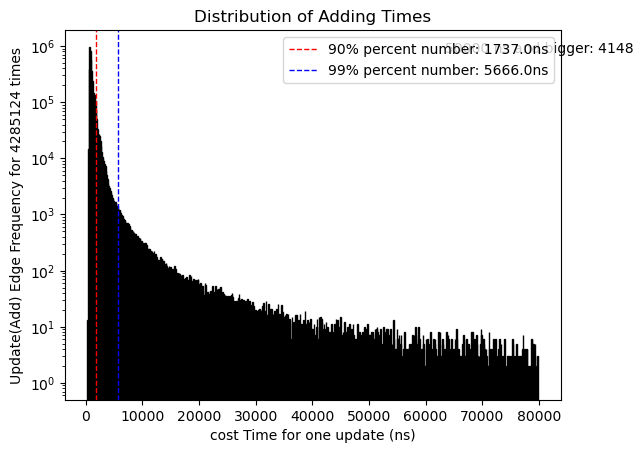

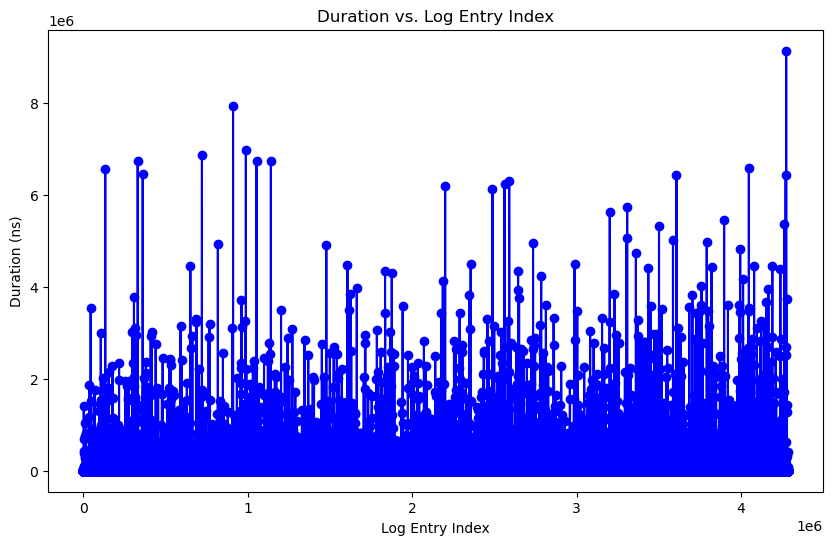

In [32]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 读取日志文件
with open('run_p_nano.log', 'r') as file:
    log_data = file.readlines()

# 提取添加时间
adding_times = []
total_num = 0
for line in log_data:
    match = re.search(r'Duration: (\d+) ns', line)
    if match:
        adding_times.append(float(match.group(1)))
        total_num += 1

# 计算90%分位数
percentile_90 = np.percentile(adding_times, 90)
print(f'90%分位数: {percentile_90}ns')

# 计算99%分位数
percentile_99 = np.percentile(adding_times, 99)
print(f'99%分位数: {percentile_99}ns')

# 定义区间
bins = np.arange(250, 80000, 125)
bins = np.append(bins, [float('inf')])  # 添加一个无限大的区间

# 统计每个区间的频率
hist, bin_edges = np.histogram(adding_times, bins=bins)

# 打印每个区间的频率
for i in range(len(hist)):
    if i == len(hist) - 1:
        print(f'{bin_edges[i]} ns 及以上: {hist[i]}')
    else:
        print(f'{bin_edges[i]} ns - {bin_edges[i+1]} ns: {hist[i]}')

# 将频数数据保存到 CSV 文件中
hist_data = {
    'Bin Start (ns)': bin_edges[:-1].astype(int),
    'Bin End (ns)': bin_edges[1:].astype(int),
    'Frequency': hist
}
df_hist = pd.DataFrame(hist_data)
df_hist.to_csv('frequency_distribution.csv', index=False)

# 绘制直方图
plt.hist(adding_times, bins=bin_edges, edgecolor='black')
plt.axvline(percentile_90, color='r', linestyle='dashed', linewidth=1, label=f'90% percent number: {percentile_90}ns')
plt.axvline(percentile_99, color='b', linestyle='dashed', linewidth=1, label=f'99% percent number: {percentile_99}ns')
plt.xlabel('cost Time for one update (ns)')
plt.ylabel(f'Update(Add) Edge Frequency for {total_num} times')
plt.yscale('log')  # 设置纵轴为对数刻度
plt.title('Distribution of Adding Times')
# 标注 50000 ns 及以上的数据量
plt.text(80000, max(hist) * 0.8, f'50000 ns and bigger: {hist[-1]}', color='black', ha='center')
plt.legend()

plt.savefig('adding_times_distribution_Nano2.png')
plt.show()

# 绘制所花时间与日志顺序的关系图
plt.figure(figsize=(10, 6))
plt.plot(range(total_num), adding_times, marker='o', linestyle='-', color='b')
plt.xlabel('Log Entry Index')
plt.ylabel('Duration (ns)')
plt.title('Duration vs. Log Entry Index')
plt.savefig('duration_vs_log_index.png')
plt.show()